In [43]:
# 単回帰モデル

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [45]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", header=None, sep="\s+")

In [46]:
df.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
pd.DataFrame(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [47]:
df.shape

(506, 14)

In [48]:
size = 500

In [49]:
X = df[:size][["RM"]].values
y = df[:size]["MEDV"].values

X[:5], y[:5]

(array([[6.575],
        [6.421],
        [7.185],
        [6.998],
        [7.147]]),
 array([24. , 21.6, 34.7, 33.4, 36.2]))

In [50]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [51]:
print("coef: {}\nintercept: {}".format(model.coef_, model.intercept_))

coef: [9.11791639]
intercept: -34.719595137981386


In [52]:
model.predict([[6]])

array([19.9879032])

In [53]:
X_data = np.arange(1, 20, 1)[:, np.newaxis]
X_data

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19]])

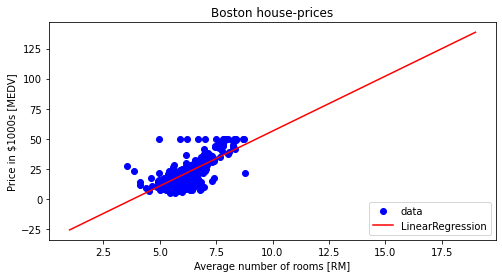

In [54]:
plt.figure(figsize=(8, 4))

y_pred = model.predict(X_data)
plt.scatter(X, y, color="blue", label="data")
plt.plot(X_data, y_pred, color="red", linestyle="-", label="LinearRegression")
plt.ylabel("Price in $1000s [MEDV]")
plt.xlabel("Average number of rooms [RM]")
plt.title("Boston house-prices")
plt.legend(loc="lower right")

plt.show()

In [ ]:
# 重回帰

In [25]:
X = df.iloc[:, 0:13].values
y = df["MEDV"].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
sc = StandardScaler()

In [32]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [33]:
model = LinearRegression()
model.fit(X_train_std, y_train)

LinearRegression()

In [35]:
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)

In [36]:
print("MSE train: {}, MES test: {}".format(np.mean((y_train - y_train_pred) ** 2), np.mean((y_test - y_test_pred) ** 2)))

MSE train: 19.326470203585725, MES test: 33.448979997676496


In [38]:
print("MSE train: {}, MES test: {}".format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

MSE train: 19.326470203585725, MES test: 33.448979997676496


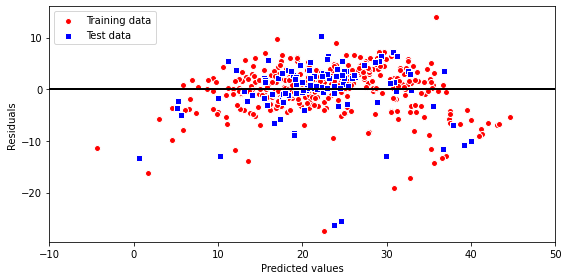

In [41]:
plt.figure(figsize=(8, 4))

plt.scatter(y_train_pred, y_train_pred - y_train,
            c="red", marker="o", edgecolor="white",
            label="Training data")
plt.scatter(y_test_pred, y_test_pred - y_test,
            c="blue", marker="s", edgecolor="white",
            label="Test data")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="black", lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()

In [55]:
# 多項式回帰

In [56]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [91]:
X = [[2, 6]]

In [95]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly

array([[ 2.,  6.,  4., 12., 36.]])

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [67]:
# sin関数予測

In [84]:
SIZE = 100

In [87]:
np.random.seed(seed=8)
X = np.random.uniform(0, 4, SIZE)[:, np.newaxis]
y = np.sin(1/4 * 2 * np.pi * X).ravel() + np.random.normal(0, 0.3, SIZE)

In [88]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

In [89]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

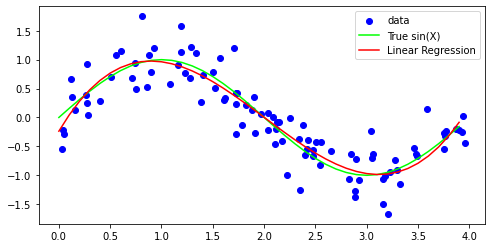

In [90]:
plt.figure(figsize=(8, 4))

X_plt = np.arange(0, 4, 0.1)[:, np.newaxis]
y_true = np.sin(1/4 * 2 * np.pi * X_plt).ravel()
y_pred = model.predict(poly.transform(X_plt))

plt.scatter(X, y, c="blue", label="data")
plt.plot(X_plt, y_true, color="lime", linestyle="-", label="True sin(X)")
plt.plot(X_plt, y_pred, color="red", linestyle="-", label="Linear Regression")
plt.legend(loc="upper right")

plt.show()

In [96]:
# 住宅の多項式回帰

In [101]:
X = df.iloc[:, :13].values
y = df["MEDV"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_test

array([[6.7240e-02, 0.0000e+00, 3.2400e+00, ..., 1.6900e+01, 3.7521e+02,
        7.3400e+00],
       [9.2323e+00, 0.0000e+00, 1.8100e+01, ..., 2.0200e+01, 3.6615e+02,
        9.5300e+00],
       [1.1425e-01, 0.0000e+00, 1.3890e+01, ..., 1.6400e+01, 3.9374e+02,
        1.0500e+01],
       ...,
       [1.4932e-01, 2.5000e+01, 5.1300e+00, ..., 1.9700e+01, 3.9511e+02,
        1.3150e+01],
       [1.4052e-01, 0.0000e+00, 1.0590e+01, ..., 1.8600e+01, 3.8581e+02,
        9.3800e+00],
       [1.2802e-01, 0.0000e+00, 8.5600e+00, ..., 2.0900e+01, 3.9524e+02,
        1.2270e+01]])

In [102]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [104]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train_poly)
X_test_std = sc.transform(X_test_poly)

In [101]:
X = df.iloc[:, :13].values
y = df["MEDV"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_test

array([[6.7240e-02, 0.0000e+00, 3.2400e+00, ..., 1.6900e+01, 3.7521e+02,
        7.3400e+00],
       [9.2323e+00, 0.0000e+00, 1.8100e+01, ..., 2.0200e+01, 3.6615e+02,
        9.5300e+00],
       [1.1425e-01, 0.0000e+00, 1.3890e+01, ..., 1.6400e+01, 3.9374e+02,
        1.0500e+01],
       ...,
       [1.4932e-01, 2.5000e+01, 5.1300e+00, ..., 1.9700e+01, 3.9511e+02,
        1.3150e+01],
       [1.4052e-01, 0.0000e+00, 1.0590e+01, ..., 1.8600e+01, 3.8581e+02,
        9.3800e+00],
       [1.2802e-01, 0.0000e+00, 8.5600e+00, ..., 2.0900e+01, 3.9524e+02,
        1.2270e+01]])

In [102]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [104]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train_poly)
X_test_std = sc.transform(X_test_poly)

In [105]:
model = LinearRegression()
model.fit(X_train_std, y_train)

LinearRegression()

In [107]:
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)

mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)

(4.340278052012233, 31.277814971444794)

In [108]:
# Ridge回帰（Polynomial 6-order）

In [109]:
SIZE = 15

In [110]:
np.random.seed(seed=8)
X = np.random.uniform(0, 4, SIZE)[:, np.newaxis]
y = np.sin(1/4 * 2 * np.pi * X).ravel() + np.random.normal(0, 0.3, SIZE)
poly = PolynomialFeatures(degree=6, include_bias=False)
X_poly = poly.fit_transform(X)

In [111]:
from sklearn.linear_model import Ridge

In [119]:
# alpha = 0.1
alpha = 0.00001

In [120]:
model = LinearRegression()
model_r = Ridge(alpha=alpha)

In [121]:
model.fit(X_poly, y)

LinearRegression()

In [122]:
model_r.fit(X_poly, y)

Ridge(alpha=1e-05)

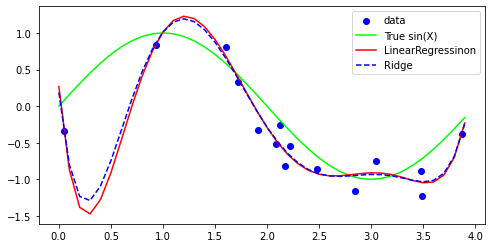

In [123]:
plt.figure(figsize=(8, 4))

x_plt = np.arange(0, 4, 0.1)[:, np.newaxis]
y_true = np.sin(1/4 * 2 * np.pi * X_plt).ravel()
y_pred = model.predict(poly.transform(X_plt))
y_pred_r = model_r.predict(poly.transform(X_plt))

plt.scatter(X, y, color="blue", label="data")
plt.plot(X_plt, y_true, color="lime", linestyle="-", label="True sin(X)")
plt.plot(X_plt, y_pred, color="red", linestyle="-", label="LinearRegressinon")
plt.plot(X_plt, y_pred_r, color="blue", linestyle="--", label="Ridge")
plt.legend(loc="upper right")
           
plt.show()

In [124]:
# Lasso

In [128]:
from sklearn.linear_model import Lasso

In [129]:
model = LinearRegression()

In [130]:
alpha = 0.1

In [131]:
model_l = Lasso(alpha=alpha)

In [ ]:
X_train_std.shape

(404, 104)

In [138]:
X = df.iloc[:, :13].values
y = df["MEDV"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_test

array([[6.7240e-02, 0.0000e+00, 3.2400e+00, ..., 1.6900e+01, 3.7521e+02,
        7.3400e+00],
       [9.2323e+00, 0.0000e+00, 1.8100e+01, ..., 2.0200e+01, 3.6615e+02,
        9.5300e+00],
       [1.1425e-01, 0.0000e+00, 1.3890e+01, ..., 1.6400e+01, 3.9374e+02,
        1.0500e+01],
       ...,
       [1.4932e-01, 2.5000e+01, 5.1300e+00, ..., 1.9700e+01, 3.9511e+02,
        1.3150e+01],
       [1.4052e-01, 0.0000e+00, 1.0590e+01, ..., 1.8600e+01, 3.8581e+02,
        9.3800e+00],
       [1.2802e-01, 0.0000e+00, 8.5600e+00, ..., 2.0900e+01, 3.9524e+02,
        1.2270e+01]])

In [139]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [140]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train_poly)
X_test_std = sc.transform(X_test_poly)

In [141]:
model.fit(X_train_std, y_train)

LinearRegression()

In [142]:
model_l.fit(X_train_std, y_train)

Lasso(alpha=0.1)

In [143]:
print(model_l.intercept_)
print(model_l.coef_)

22.611881188118844
[-0.          0.          0.          0.         -0.          0.
  0.         -0.          0.          0.         -0.          0.
 -0.          0.          0.24633868 -0.          0.56721098 -0.26764504
 -0.71696315 -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.48958407 -0.46755873  0.11857147  0.
  0.00713714  0.          0.          0.         -0.          0.
  0.         -0.07437602  0.06232768 -0.         -0.         -0.
  0.         -0.11989191  0.43944794  0.          0.          0.
 -0.          0.         -0.          0.          0.          0.09828279
  0.          0.          0.          0.         -0.         -0.
 -1.21751701 -0.         -0.98619835  0.         -0.         -0.
  0.         -0.          5.87856207 -0.         -0.         -0.
 -0.         -1.92687309  0.         -5.22072694  0.         -0.
  0.          0.          0.          0.         -0.         -0.
  0.23376925 -0.66826934 -0.         -0.          0.   

In [144]:
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)

mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)

(4.340278052012233, 31.277814971444794)

In [146]:
y_train_l_pred = model_l.predict(X_train_std)
y_test_l_pred = model_l.predict(X_test_std)

mean_squared_error(y_train, y_train_l_pred), mean_squared_error(y_test, y_test_l_pred)

(11.926158040527103, 23.93928952208267)

In [148]:
from sklearn.linear_model import ElasticNet

In [ ]:
alpha = 0.1
l1_ratio = 0.6

In [151]:
model_e = ElasticNet(alpha=0.1, l1_ratio=0.6)
model_e.fit(X_train_std, y_train)

# print(model_e.coef_)

y_train_pred = model_e.predict(X_train_std)
y_test_pred = model_e.predict(X_test_std)

mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)

(12.155107996643016, 25.058665863264768)

In [156]:
# alphaの検証
for l1_ratio in range(0, 11):
    model_e = ElasticNet(alpha=0.1, l1_ratio=(l1_ratio/10))
    model_e.fit(X_train_std, y_train)

    # print(model_e.coef_)

    y_train_pred = model_e.predict(X_train_std)
    y_test_pred = model_e.predict(X_test_std)

    print(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred))

/opt/anaconda3/envs/ml-study/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.061e+03, tolerance: 3.440e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/ml-study/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+01, tolerance: 3.440e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/ml-study/lib/python3.9/site-packages/sklearn/linear_model/_coor

11.97688239818212 25.127603773554096
12.03727422457328 25.180122831121604
12.07274016708152 25.21092938689579
12.111416347770414 25.21212071710163
12.163564546372266 25.205902262287278
12.174914060981529 25.122014137696016
12.155107996643016 25.058665863264768
12.112963937228931 24.875990585778926
12.043912234832042 24.631625360980703
11.999228780834892 24.37795006175644
11.926158040527103 23.93928952208267


In [157]:
# 確率的勾配効果法

In [158]:
from sklearn.linear_model import SGDRegressor

In [161]:
from sklearn.datasets import load_boston
boston = load_boston()

X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [162]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [163]:
model = SGDRegressor(loss="squared_loss", max_iter=100, eta0=0.01,
                     learning_rate="constant", alpha=1e-09, penalty="l2",
                     l1_ratio=0, random_state=0)
model.fit(X_train_std, y_train)

/opt/anaconda3/envs/ml-study/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(


SGDRegressor(alpha=1e-09, l1_ratio=0, learning_rate='constant',
             loss='squared_loss', max_iter=100, random_state=0)

In [164]:
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)

mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)

(19.567080796272577, 34.03660789079716)

In [165]:
# 確率的勾配効果法の正則化

In [176]:
model = SGDRegressor(loss="squared_loss", max_iter=100, eta0=0.01,
                     learning_rate="constant", alpha=1e-01, penalty="l2",
                     l1_ratio=0, random_state=0)
model.fit(X_train_std, y_train)

/opt/anaconda3/envs/ml-study/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(


SGDRegressor(alpha=0.1, l1_ratio=0, learning_rate='constant',
             loss='squared_loss', max_iter=100, random_state=0)

In [177]:
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)

mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)

(22.460621377109618, 32.0026157117652)

In [178]:
# SVR

In [179]:
from sklearn.svm import SVR

In [180]:
size = 20

In [181]:
boston = load_boston()
X = boston.data[:size, [5]]
y = boston.target[:size]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

/opt/anaconda3/envs/ml-study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

In [182]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [183]:
model = LinearRegression()
model_s = SVR(kernel="linear", C=10000.0, epsilon=4.0)

model.fit(X_train_std, y_train)
model_s.fit(X_train_std, y_train)

SVR(C=10000.0, epsilon=4.0, kernel='linear')

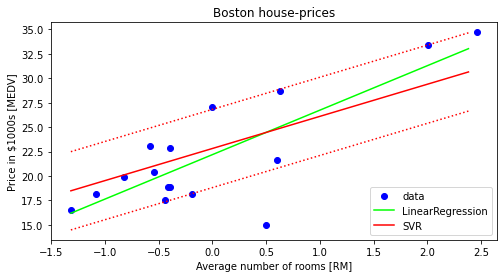

In [185]:
plt.figure(figsize=(8, 4))

X_plt = np.arange(X_train_std.min(), X_train_std.max(), 0.1)[:, np.newaxis]
y_plt_pred = model.predict(X_plt)
y_plt_pred_s = model_s.predict(X_plt)

plt.scatter(X_train_std, y_train, color="blue", label="data")
plt.plot(X_plt, y_plt_pred, color="lime", linestyle="-", label="LinearRegression")
plt.plot(X_plt, y_plt_pred_s, color="red", linestyle="-", label="SVR")
plt.plot(X_plt, y_plt_pred_s+model_s.epsilon, color="red", linestyle=":")
plt.plot(X_plt, y_plt_pred_s-model_s.epsilon, color="red", linestyle=":")

plt.ylabel("Price in $1000s [MEDV]")
plt.xlabel("Average number of rooms [RM]")
plt.title("Boston house-prices")
plt.legend(loc="lower right")

plt.show()

In [186]:
model_s.support_vectors_

array([[ 2.00461579],
       [ 0.49545815],
       [-0.00273398],
       [-0.1874296 ]])

In [187]:
model_s.support_

array([2, 3, 6, 8], dtype=int32)

In [189]:
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)

mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)

(11.72383727119141, 14.938071930509103)

In [190]:
y_train_pred = model_s.predict(X_train_std)
y_test_pred = model_s.predict(X_test_std)

mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)

(13.711761242727356, 11.641944724194264)

In [191]:
# SVR (linear, params=13)

In [192]:
boston = load_boston()
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

/opt/anaconda3/envs/ml-study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

In [193]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [194]:
model = SVR(kernel="linear", C=10.0, epsilon=5.0)
model.fit(X_train_std, y_train)

SVR(C=10.0, epsilon=5.0, kernel='linear')

In [195]:
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)
mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)

(20.27935258834585, 35.83801054071221)